<a href="https://colab.research.google.com/github/JeanLeclerc1/CIND820Capstone/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Link to dataset: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving high_diamond_ranked_10min.csv to high_diamond_ranked_10min.csv


In [ ]:
import io
df_main = pd.read_csv(io.BytesIO(uploaded['high_diamond_ranked_10min.csv']))
df = pd.read_csv(io.BytesIO(uploaded['high_diamond_ranked_10min.csv']))

# Dataset is now stored in a Pandas Dataframe

In [ ]:
pd.set_option('display.max_columns', None)
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [ ]:
#1. Data visualization and cleaning

In [ ]:
#Let's create the main database df_clean
df_clean = df.copy()

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [ ]:
#Let's check for null values
df_clean.isnull().values.any()

False

In [ ]:
#blueWins is the class variable
#Now we look for outliers
#We can start by having a look at the distribution of the attribute blueWardsPlaced

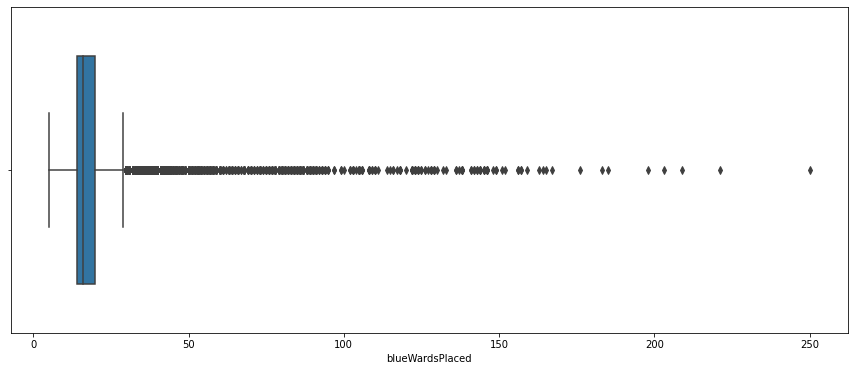

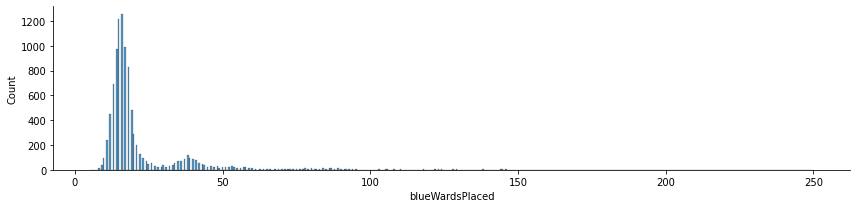

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(15, 6))
bp = sns.boxplot(x=df_clean["blueWardsPlaced"], width=0.7)
0.99*250
pd = sns.displot(df_clean["blueWardsPlaced"], log_scale=False, height=3, aspect=4)

In [ ]:
#The outliers come from games that were automatically losses (explained in the literature review) and so they should be removed. 
#Any team with over 100 wards at 10 minutes would mean players placed more than 2 ward a minute which is irrealistic and nearly impossible. 
#We remove all games with wardsPlaced > 100

In [ ]:
#We remove the rows with >100 wards

indexNames = df_clean[ df_clean['blueWardsPlaced'] > 100].index
df_clean.drop(indexNames , inplace=True)

indexNames = df_clean[ df_clean['redWardsPlaced'] > 100].index
df_clean.drop(indexNames , inplace=True)

removed = df.shape[0] - df_clean.shape[0]
print("We removed {} outliers from the dataset".format(removed))

We removed 216 outliers from the dataset


In [ ]:
#Since those high warding games are removed, we don't need to do this again for high WardsDestroyed 

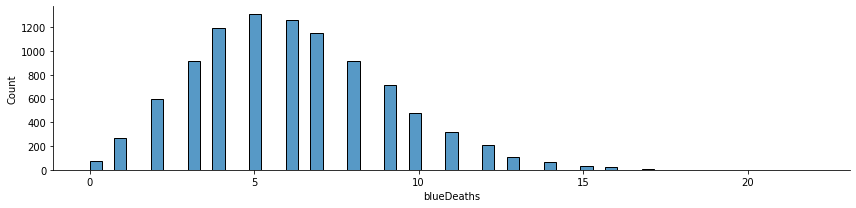

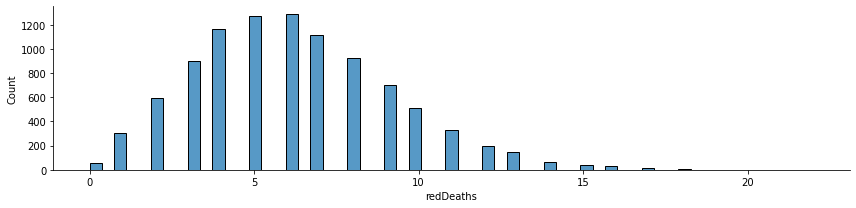

In [ ]:
#Same as previously, some players will die on purpose repeatedly if they think the game is lost. Because of this, we should also check for outliers for blueDeaths and redDeaths
pd = sns.displot(df_clean["blueDeaths"], log_scale=False, height=3, aspect=4)
pd = sns.displot(df_clean["redDeaths"], log_scale=False, height=3, aspect=4)


In [ ]:
#We keep everything that is the same or below the 99th percentile
df_clean = df_clean.loc[df_clean['blueDeaths'] <= np.quantile(df_clean['blueDeaths'],q=0.99)]
df_clean = df_clean.loc[df_clean['redDeaths'] <= np.quantile(df_clean['redDeaths'],q=0.99)]

removed = df.shape[0] - (df_clean.shape[0] + removed)
print("We removed {} outliers from the dataset".format(removed))

We removed 149 outliers from the dataset


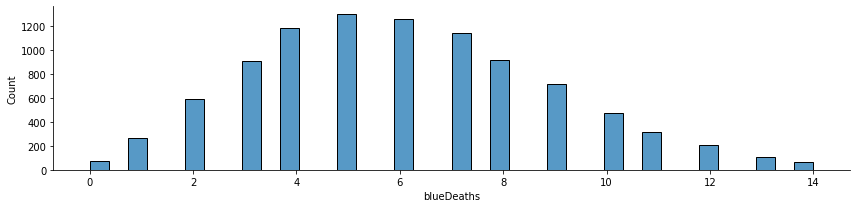

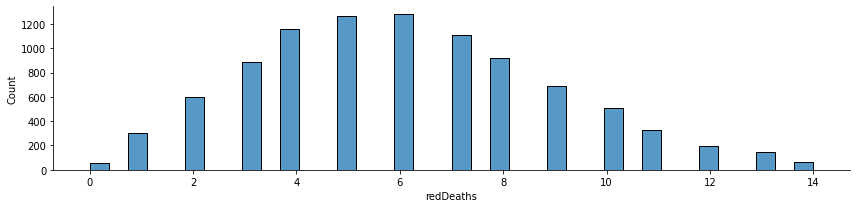

In [ ]:
#This is what these attributes looks like after removing the outliers:
pd = sns.displot(df_clean["blueDeaths"], log_scale=False, height=3, aspect=4)
pd = sns.displot(df_clean["redDeaths"], log_scale=False, height=3, aspect=4)

In [ ]:
print("In total, we removed {} outliers from the dataset".format(df.shape[0] - df_clean.shape[0]))
print("The dataset now has {} rows".format(df_clean.shape[0]))


In total, we removed 365 outliers from the dataset
The dataset now has 9514 rows


In [ ]:
#Let's have a look at the correlations between attributes. 
#Here I have created a new dataframe with only 12 of the main dataset's attributes (instead of the original 40)
#I purposely picked the attributes with the highest correlations to demonstrate their values and relationship to each other.

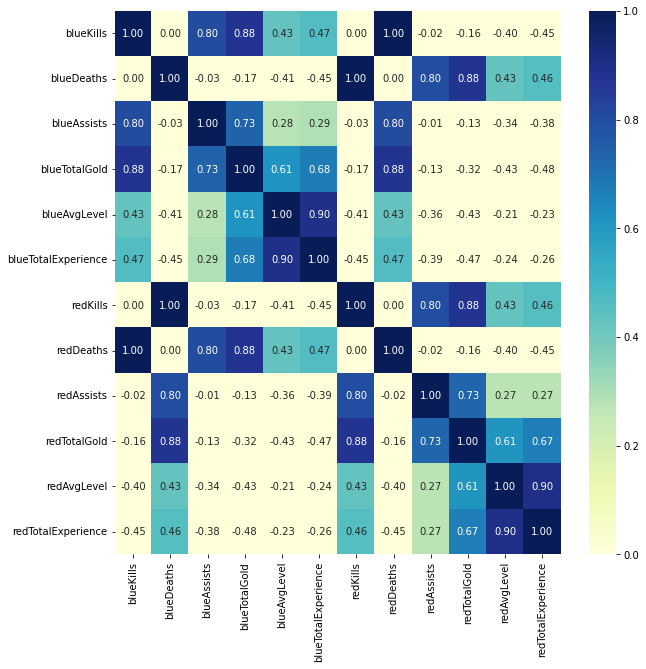

In [ ]:
df_corr = df_clean[['blueKills', 'blueDeaths', 'blueAssists', 'blueTotalGold', 'blueAvgLevel', 'blueTotalExperience', 'redKills', 'redDeaths', 'redAssists', 'redTotalGold', 'redAvgLevel', 'redTotalExperience']]
plt.figure(figsize=(10, 10))
sns.heatmap(df_corr.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

In [ ]:
#We can see there is definitely some strong correlations amongst attributes. 
#For example, blueAvgLevel has a 0.9 correlation factor to blueTotalExperience. This is because average level is total experience divided by the number of players
#Another example is blueKills has a correlation factor or 1.0 with redDeaths. A kill for the blue team is always a death for the red team.
#By taking the difference of these attributes, we can eliminate some of the strong correlations present within the dataset. 
#Indeed, if we create the attribute killsDiff = blueKills - blueDeaths, we can then remove 'blueKills', 'blueDeaths', 'redKills' and 'redDeaths'.

In [ ]:
#Let's drop unnecessary columns
#Remove gameId
#Remove eliteMonsters because elite monsters = dragon + herald which are already in the dataset
#Remove all the already existing diff colums since we create our own later on ('blueGoldDiff', 'blueExperienceDiff','redGoldDiff', 'redExperienceDiff')
#Remove the "per min" metrics: 'blueCSPerMin', 'blueGoldPerMin', 'redCSPerMin', 'redGoldPerMin' because we already have their total in the dataset (blueCSPerMin = BlueTotalMinionsKilled / min etc.)
#Remove redFirstBlood', 'redKills', 'redDeaths'because of high correlations (blueKills = redDeaths, blueDeaths = redKills)
#Remove 'blueAvgLevel', 'redAvgLevel' because average level is very closely correlated to totalExperience already

colsDrop = ['gameId', 'blueEliteMonsters', 'blueGoldDiff', 'blueExperienceDiff', 'blueCSPerMin', 'blueGoldPerMin', 'blueAvgLevel', 'redFirstBlood', 
             'redKills', 'redDeaths', 'redEliteMonsters', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin', 'redAvgLevel']
df_clean = df_clean.drop(axis=1,  columns=colsDrop)

In [ ]:
#Now, we create the difference of colums
#For example, wardsPlacedDiff = blueWardsPlaced - redWardsPlaced
#Note: killsDiff = blueKills - blueDeaths 

In [ ]:
df_clean['wardsPlacedDiff'] = df_clean['blueWardsPlaced'] - df_clean['redWardsPlaced']
df_clean['wardsDestroyedDiff'] = df_clean['blueWardsDestroyed'] - df_clean['redWardsDestroyed']
df_clean['killDiff'] = df_clean['blueKills'] - df_clean['blueDeaths']
df_clean['assistDiff'] = df_clean['blueAssists'] - df_clean['redAssists']
df_clean['dragonDiff'] = df_clean['blueDragons'] - df_clean['redDragons']
df_clean['heraldDiff'] = df_clean['blueHeralds'] - df_clean['redHeralds']
df_clean['towersDestroyedDiff'] = df_clean['blueTowersDestroyed'] - df_clean['redTowersDestroyed']
df_clean['goldDiff'] = df_clean['blueTotalGold'] - df_clean['redTotalGold']
df_clean['totalMinionsKilledDiff'] = df_clean['blueTotalMinionsKilled'] - df_clean['redTotalMinionsKilled']
df_clean['totalJungleMinionsKilledDiff'] = df_clean['blueTotalJungleMinionsKilled'] - df_clean['redTotalJungleMinionsKilled']
df_clean['totalExperienceDiff'] = df_clean['blueTotalExperience'] - df_clean['redTotalExperience']

In [ ]:
#Then, we select all the colums we used for the difference and drop them.
colsdiff = ['blueWardsPlaced', 'redWardsPlaced', 'blueWardsDestroyed', 'redWardsDestroyed', 'blueKills', 'blueDeaths', 
                     'blueAssists', 'redAssists','blueDragons', 'redDragons', 'blueHeralds', 'redHeralds', 'blueTowersDestroyed','redTowersDestroyed', 'blueTotalGold', 'redTotalGold', 
                     'blueTotalMinionsKilled', 'redTotalMinionsKilled', 'blueTotalJungleMinionsKilled', 'redTotalJungleMinionsKilled', 
                     'blueTotalExperience', 'redTotalExperience']


In [ ]:
df_clean = df_clean.drop(axis=1, columns=colsdiff)

In [ ]:
#Let's have a look at the dataset now 
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9514 entries, 0 to 9878
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   blueWins                      9514 non-null   int64
 1   blueFirstBlood                9514 non-null   int64
 2   wardsPlacedDiff               9514 non-null   int64
 3   wardsDestroyedDiff            9514 non-null   int64
 4   killDiff                      9514 non-null   int64
 5   assistDiff                    9514 non-null   int64
 6   dragonDiff                    9514 non-null   int64
 7   heraldDiff                    9514 non-null   int64
 8   towersDestroyedDiff           9514 non-null   int64
 9   goldDiff                      9514 non-null   int64
 10  totalMinionsKilledDiff        9514 non-null   int64
 11  totalJungleMinionsKilledDiff  9514 non-null   int64
 12  totalExperienceDiff           9514 non-null   int64
dtypes: int64(13)
memory usage: 1.0 MB

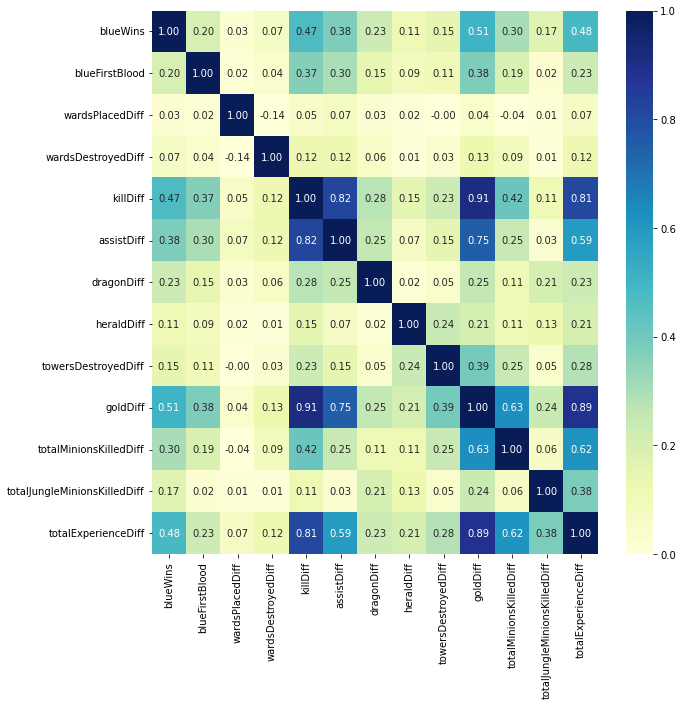

In [ ]:
#Let's see the correlation heatmap for the entire clean dataset
plt.figure(figsize=(10, 10))
sns.heatmap(df_clean.corr(), cmap='YlGnBu', annot=True, fmt='.2f', vmin=0);

In [ ]:
#We can see an improvement. Less attributes are correlated and with smaller correlation factors.
#However, there are still some high correlations especially for the gold and experience attributes. Since these are integral factor to finding out the outcome of a game we will leave them in for now.



In [ ]:
#2. Model proof of concept

Red Wins: 4772 (50.158%), Blue Wins: 4742(49.842%)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


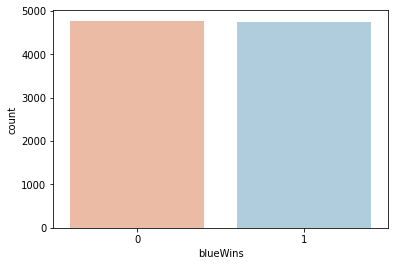

In [ ]:
#Let's make sure the class variable blueWins is still balanced
y = df_clean.blueWins
ax = sns.countplot(y, label='Count', palette='RdBu')
W, L = y.value_counts()

print('Red Wins: {} ({}%), Blue Wins: {}({}%)'.format(W,round(100*W/(W+L),3),L,round(100*L/(W+L),3)))

In [ ]:
#Logistic Regression
#For now, we are going to create a model based on Logistic Regression
#We have not done data standardization yet, let's see well the model does

In [ ]:
# train test split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
X = df_clean.drop(['blueWins'],axis=1)
y = df_clean['blueWins']
scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

In [ ]:
#Logistic regression model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score

lm = LogisticRegression()
lm.fit(X_train, y_train)

#Get accuracy score
pred_lm = lm.predict(X_test)

acc_lm = accuracy_score(pred_lm, y_test)

print('We obtain an accuracy of {}, relatively good.'.format(acc_lm*100))

We obtain an accuracy of 71.83394640042039, relatively good.


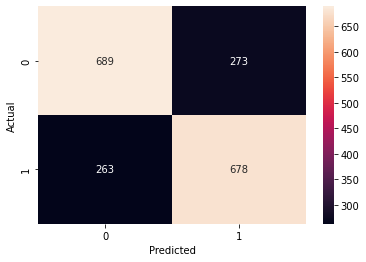

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#The confusion matrix

confusion_matrix = pd.crosstab(pred_lm, y_test, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='g')
plt.show()

In [ ]:
print('We obtain a precision score of {}.'.format(round(precision_score(pred_lm, y_test), 2)))
print('We obtain a recall score of {}.'.format(round(recall_score(pred_lm, y_test), 2)))


We obtain a precision score of 0.71.
We obtain a recall score of 0.72.


In [ ]:
#For now, this model is just a proof of concept. We will try adjusting it later by using data standardization on some attributes, getting rid of strongly correlated attributes, comparing it to other models etc. 



In [ ]:
#3. Specific analysis

In [ ]:
#Another way to look at the impact of certain attributes on win rate is by studying specific attributes.
#Below is an example of this

[Text(0.5, 1.0, 'Values for dragonDiff')]

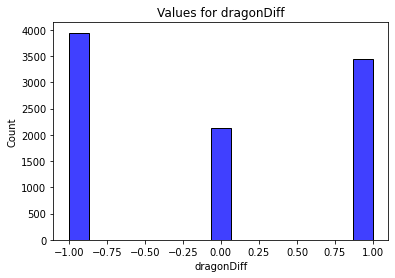

In [ ]:
#Let's look at the  the attribute 'dragonDiff' = blueDragon - redDragon
#the values are either -1, 0 or 1

sns.histplot(data= df_clean['dragonDiff'], color='b').set(title = 'Values for dragonDiff')

In [ ]:
#This is because at 10 mins, it is only possible for a single dragon to have appeared in the match
#Thus, if blue team kills the dragon it is impossible for red team to do so, and vice versa. 
#In this histogram, this is respectively dragonDiff = +1 and -1.
#In addition, it is also possible that neither team kills a dragon. (dragonDiff =  0)

In [ ]:
#Dragons in LoL usually require a lot of prior investment and planning, as they are considered a big decision the outcome of a game
#Here we have 3 possibilities: the team gets the dragon, the enemy team gets the dragon or neither team get the dragon.

#How much does getting the dragon help for winning a game? Is it worth pursuing as a plan for the early game?
#Let's look at all the games where the blue team got the dragon.

In [ ]:
blueWinRateFor1Dragon = df_clean.query('dragonDiff == 1 & blueWins == 1').shape[0] / df_clean.query('dragonDiff == 1').shape[0]
print('Winrate when the blue team gets the dragon: {}%\nOr {} out of {} games.'.format(round(blueWinRateFor1Dragon*100, 3), df_clean.query('dragonDiff == 1 & blueWins == 1').shape[0], df_clean.query('dragonDiff == 1').shape[0]))


Winrate when the blue team gets the dragon: 63.829%
Or 2197 out of 3442 games.


In [ ]:
#Now let's see the win rate when the blue team loses the dragon

In [ ]:
blueWinRateForNoDragon = df_clean.query('dragonDiff == -1 & blueWins == 1').shape[0] / df_clean.query('dragonDiff == -1').shape[0]
print('Winrate when the blue team loses the dragon: {}%\nOr {} out of {} games.'.format(round(blueWinRateForNoDragon*100, 3), df_clean.query('dragonDiff == -1 & blueWins == 1').shape[0], df_clean.query('dragonDiff == -1').shape[0]))


Winrate when the blue team loses the dragon: 37.592%
Or 1483 out of 3945 games.


In [ ]:
#Finally this concept is the exact same for the herald as it appears only once in the first 10 minutes.

In [ ]:
blueWinRateFor1Herald = df_clean.query('heraldDiff == 1 & blueWins == 1').shape[0] / df_clean.query('heraldDiff == 1').shape[0]
blueWinRateForNoHerald = df_clean.query('heraldDiff == -1 & blueWins == 1').shape[0] / df_clean.query('heraldDiff == -1').shape[0]
print('Winrate when the blue team gets the herald: {}%.'.format(round(blueWinRateFor1Herald*100, 2)))
print('Winrate when the blue team loses the herald: {}%.'.format(round(blueWinRateForNoHerald*100, 2)))


Winrate when the blue team gets the herald: 58.95%.
Winrate when the blue team loses the herald: 39.34%.


In [ ]:
#Dragons and heralds definitely contribute to winning games. However they might not be the cause. 
#For example, it may be the prior setup and planning as well as execution of the fight that decides the outcome.